Este proyecto se enmarca dentro de la Agricultura de Precisión, una forma avanzada de gestión de información diseñada para potenciar la productividad agrícola al proporcionar herramientas que asisten al agricultor en la toma de decisiones.

El proyecto tiene como objetivo desarrollar un modelo de clasificación que sugiera la semilla más apropiada para la plantación en un terreno específico, considerando características como Nitrógeno, Fósforo, Potasio, Temperatura, Humedad, PH y Lluvia. Además, se llevará a cabo una clusterización de los datos utilizando las variables de Temperatura, Humedad y Lluvia, con el propósito de ofrecer recomendaciones para otras semillas que compartan similitudes en dichas variables.

Las características que disponemos en nuestro conjunto de datos son las siguientes:

- Ratio de nitrógeno en el suelo.
- Ratio de Fósforo en el suelo.
- Ratio de Potasio en el suelo.
- Temperatura en grados Celsius.
- Humedad.
- PH del suelo.
- Lluvia en mm.

#### Características del suelo

1. **Nitrógeno:** Un elemento crucial para el desarrollo vegetal, el nitrógeno desempeña un papel fundamental en la síntesis de proteínas, esencial para el crecimiento de las plantas. No solo contribuye a la producción de clorofila, facilitando la fotosíntesis, sino que también fortalece la resistencia de las plantas frente a enfermedades y plagas.

2. **Fósforo:** Esencial para el desarrollo de raíces robustas y la producción de semillas y frutas, el fósforo desempeña un papel vital en la fotosíntesis y en la generación de energía en las plantas. Su presencia adecuada en el suelo es clave para el éxito del ciclo de vida de las plantas.

3. **Potasio:** Un nutriente crucial para el crecimiento saludable de las plantas, el potasio regula procesos clave como la apertura y cierre de los estomas. Esto permite que las plantas controlen la transpiración y la absorción de agua, contribuyendo a su adaptabilidad a condiciones ambientales variables. Además, el potasio es esencial en la síntesis de proteínas y en la formación de flores y frutos.

4. **pH:** El pH del suelo, indicador de su acidez o alcalinidad, desempeña un papel determinante en la salud de las plantas. La mayoría de las semillas prefieren un pH ligeramente ácido, dentro del rango de 6.0 a 7.0. Un equilibrio adecuado es crucial, ya que un pH extremadamente ácido o alcalino puede afectar negativamente el crecimiento y desarrollo de las semillas. Ajustar el pH del suelo es una práctica clave para optimizar las condiciones de cultivo.

#### Características ambientales

5. **Temperatura:** La temperatura emerge como un factor crítico al considerar la siembra de semillas. Cada variedad de semilla tiene su propia temperatura óptima para la germinación y el crecimiento. En líneas generales, las semillas requieren condiciones térmicas cálidas para germinar, pero sin llegar a extremos de calor. Si la temperatura es demasiado baja, las semillas pueden experimentar una germinación retardada o incluso no germinar en absoluto.

6. **Humedad:** La humedad desempeña un papel esencial en los procesos de germinación y crecimiento de las semillas. La cantidad específica de humedad requerida varía según el tipo de semilla y las condiciones ambientales circundantes. Mantener un entorno húmedo es crucial para asegurar que las semillas germinen de manera exitosa y para respaldar su desarrollo continuo.

7. **Lluvia:** El patrón de lluvia necesario en la agricultura varía en función del tipo de cultivo y de la región geográfica. Algunos cultivos demandan una mayor cantidad de agua, mientras que otros exhiben una mayor tolerancia a la sequía. La variabilidad climática entre distintas regiones implica que los requisitos de lluvia pueden diferir significativamente en diversas partes del mundo. La comprensión precisa de estos patrones es esencial para la gestión eficaz de los recursos hídricos en la agricultura.


In [ ]:
# Librerias a utilizar.

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.mixture import GaussianMixture
from sklearn import metrics

import plotly.graph_objects as go

In [ ]:
# Cargamos los datos.
# Datos obtenidos en https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

df = pd.read_csv('/content/Crop_recommendation.csv')

## 1. Exploracion de Datos

In [ ]:
# El set de datos contiene 2200 filas y 8 columnas.

df.shape

(2200, 8)

In [ ]:
# Observamos algunos registros del set de datos.

df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2139,113,21,33,26.022414,55.832890,7.277423,176.902092,coffee
663,9,48,22,27.770763,87.099795,6.402926,49.508126,mungbean
59,99,55,35,21.723831,80.238990,6.501698,277.962619,rice
1677,37,18,12,10.270888,90.191477,7.401122,106.695520,orange
1695,27,30,5,32.717485,90.546083,7.656978,113.328978,orange


In [ ]:
# Cambiamos el nombre de las variables para una mayor interpretabilidad.

df.columns = ['Nitrogeno', 'Fosforo', 'Potasio', 'Temperatura', 'Humedad', 'PH', 'Lluvia', 'Label']

In [ ]:
# Comprobamos los tipos de las variables. Parecen todas estar codificadas correctamente.

df.dtypes

Nitrogeno        int64
Fosforo          int64
Potasio          int64
Temperatura    float64
Humedad        float64
PH             float64
Lluvia         float64
Label           object
dtype: object

In [ ]:
# Resumen de las estadisticas descriptivas de las variables.

# Observamos que, en promedio, las semillas cumplen características genericas,
# como un crecimiento óptimo en un rango de pH cercano a 7 y una
# germinación exitosa a temperaturas que oscilan entre 15 y 30 grados.

df.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,PH,Lluvia
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# Buscamos valores nulos en las variables

df.isna().sum()

Nitrogeno      0
Fosforo        0
Potasio        0
Temperatura    0
Humedad        0
PH             0
Lluvia         0
Label          0
dtype: int64

In [ ]:
# Chequeamos si existen filas duplicadas en el set de datos.

print('Numero de filas duplicadas:', df.duplicated().sum())

Numero de filas duplicadas: 0


###2. Analisis de la Variable Objetivo

In [ ]:
print('Cantidad de clases a clasificar:', len(df['Label'].unique()))

Cantidad de clases a clasificar: 22


<Axes: xlabel='count', ylabel='Label'>

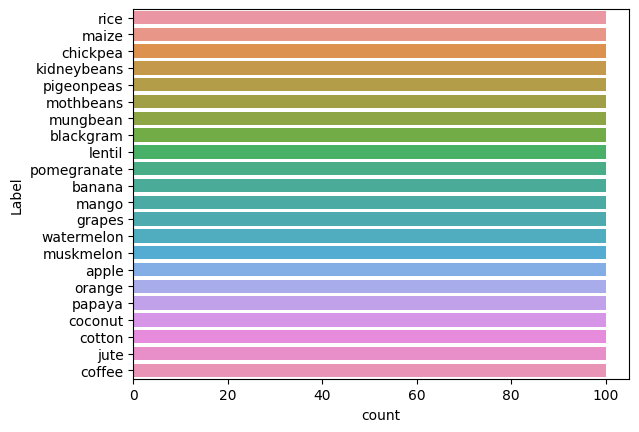

In [ ]:
# Nos encontramos con clases balanceadas. 100 observacion por cada clase.

sns.countplot(df, y='Label')

### 3. Analisis de las variables dependientes

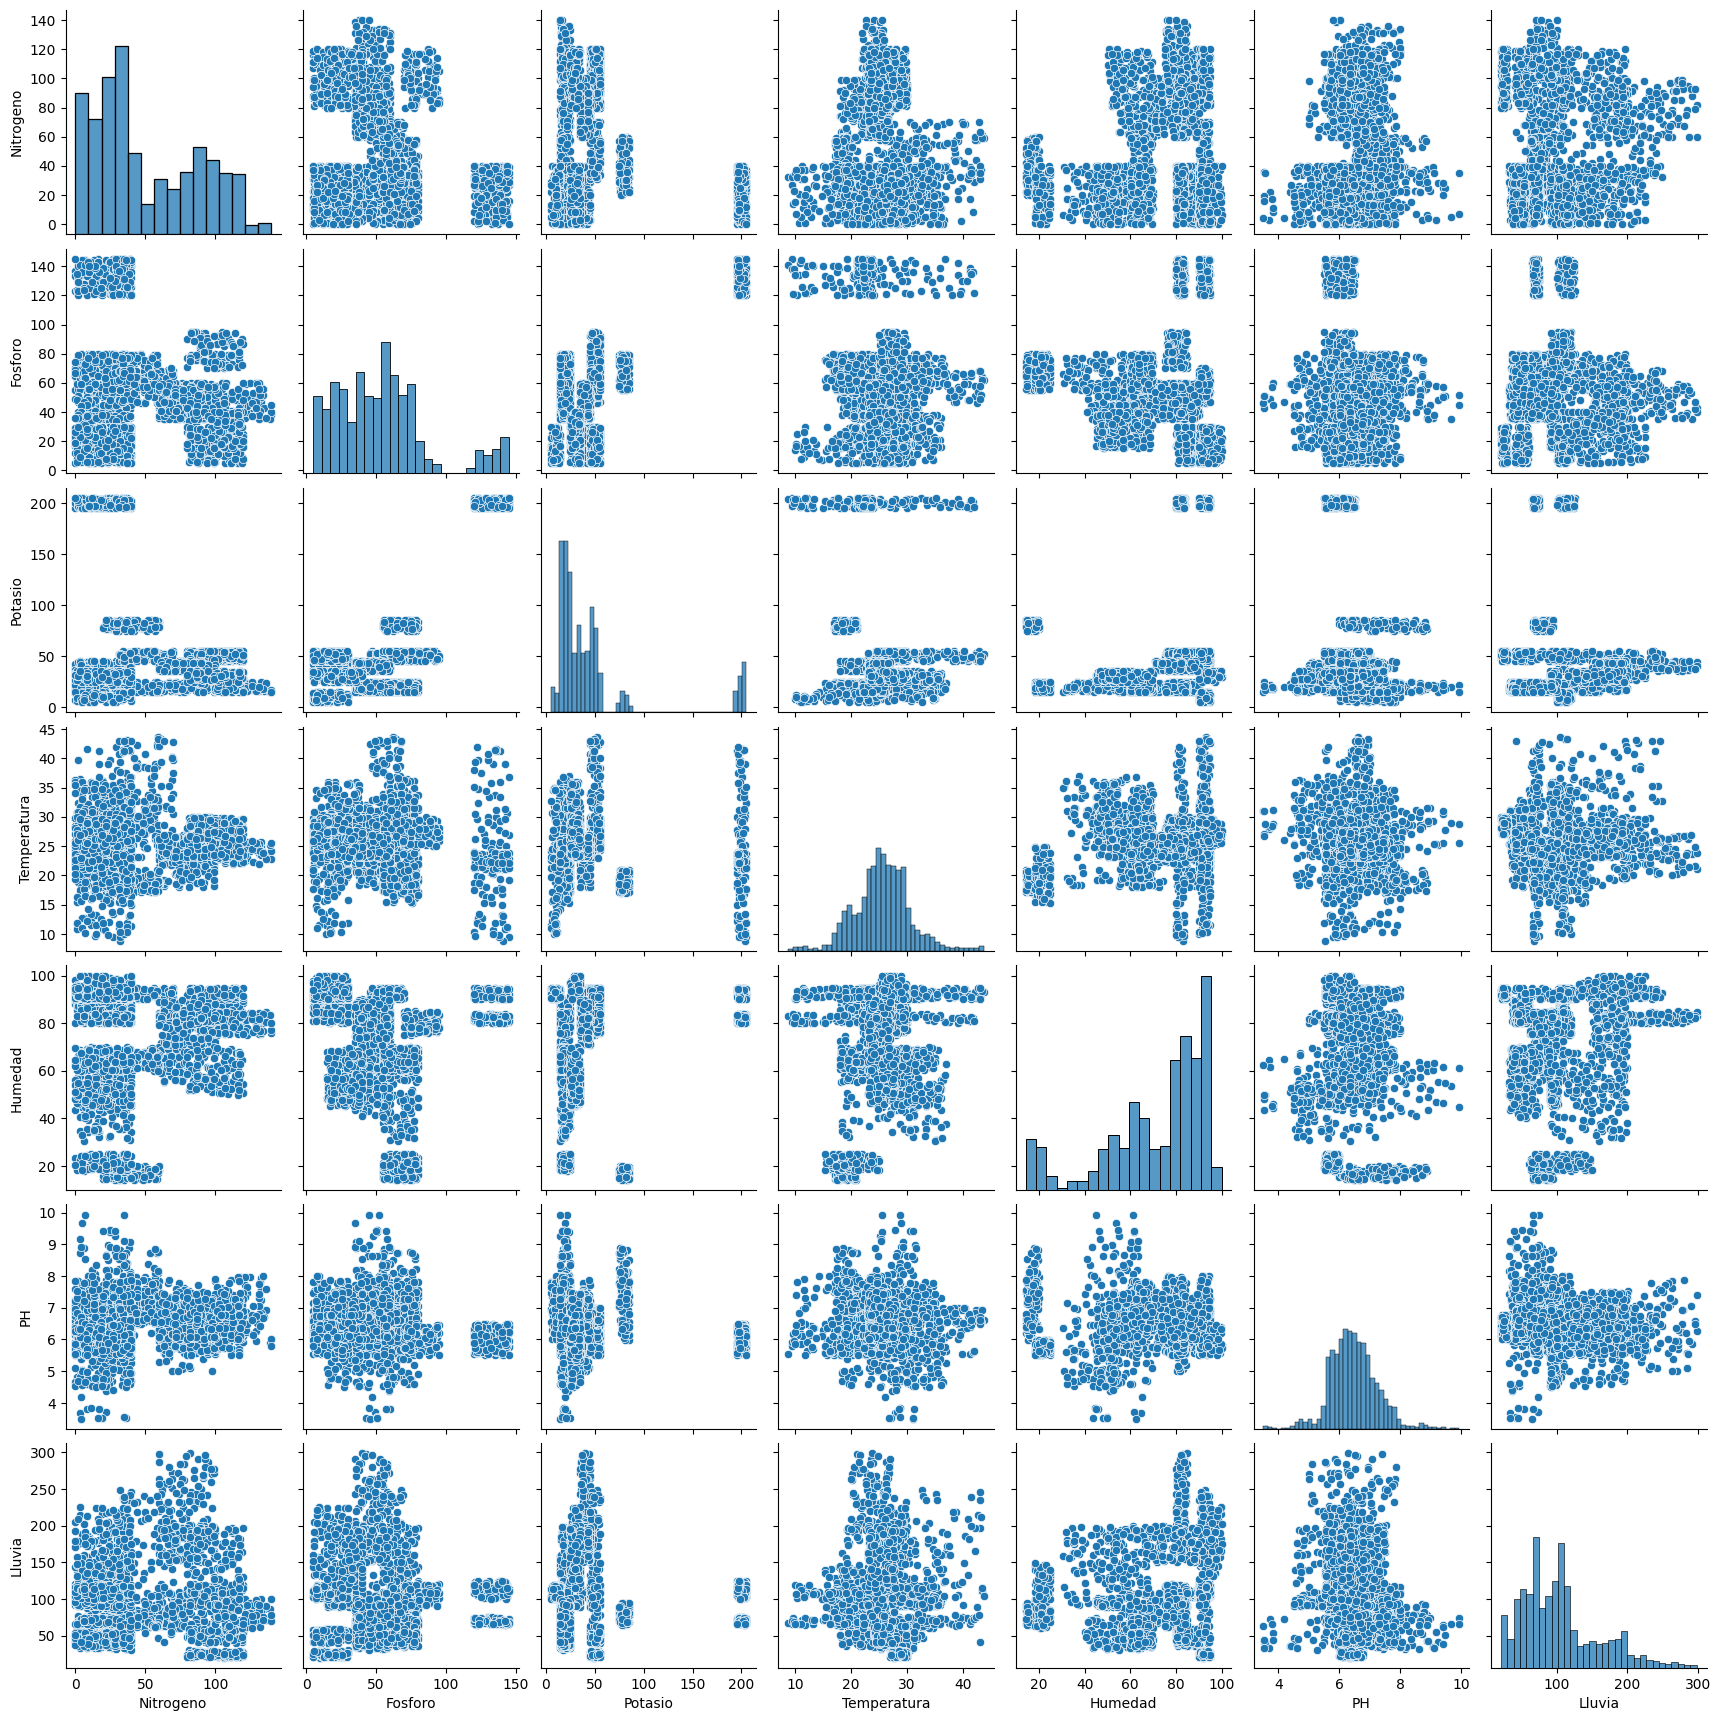

In [ ]:
# Creamos un grafico a pares para ver la relaciones entre las variable.
# No se observa una clara correlacion entre variables, si se pueden ver como los datos
# se agrupan claramente en diferentes clusteres.

sns.pairplot(df, vars=df.columns[:-1])

<Axes: >

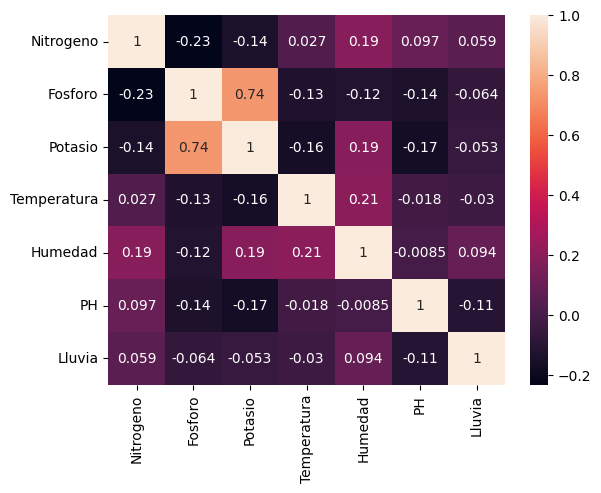

In [ ]:
# Hemos empleado una matriz de correlación para investigar más a fondo
# la relación entre las variables. Observamos una correlación significativa
# entre las variables de fósforo y potasio, aunque al examinar el gráfico
# de dispersión entre ambas, esta correlación no parece tan evidente.
# Para una modelización más precisa de nuestros datos, planeamos utilizar
# el método VIF (factor de inflación de la varianza) con el objetivo de abordar
# y esclarecer esta relación aparentemente compleja.

sns.heatmap(df.loc[:,df.columns[:-1]].corr(), annot=True)

<Figure size 1000x1800 with 0 Axes>

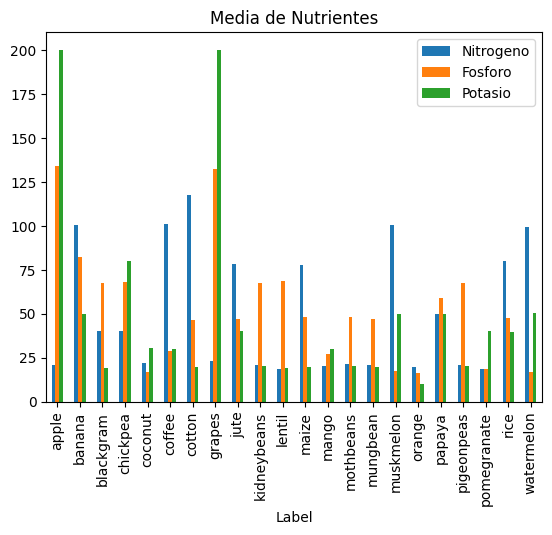

In [ ]:
# En el siguiente grafico se representan la media de nutrientes necesitada
# por cada una de las semillas. Destacan las semillas de uva y de manzana
# que exigen una alta cantidad de potasio y fosforo en comparacion a las demas.
# Las naranjas necesitan una pequeña cantidad de los 3 nutrientes.

plt.figure(figsize=(10,18))
df.groupby('Label')[['Nitrogeno', 'Fosforo', 'Potasio']] \
  .agg(['mean']) \
  .plot(kind='bar', title= 'Media de Nutrientes')


plt.gca().legend(('Nitrogeno', 'Fosforo', 'Potasio'))
plt.show()

A continuacion vamos a filtrar las semillas que exigen caracateristicas ambientales alejadas de los valores medios

Las temperaturas ideales para la germinación varían según la especie de planta. A continuación, se presenta una clasificación general con las temperaturas promedio:

1. **Semillas de temperatura fría:**
   - **Temperatura de germinación:** 5-15 °C (41-59 °F)
   - **Cultivos destacados:** Lechuga, espinacas, zanahorias
   - **Época de siembra recomendada:** Otoño o principios de primavera

2. **Semillas de temperatura fresca a templada:**
   - **Temperatura de germinación:** 15-25 °C (59-77 °F)
   - **Cultivos destacados:** Tomates, guisantes, rábanos
   - **Época de siembra recomendada:** Primavera o principios de verano

3. **Semillas de temperatura cálida:**
   - **Temperatura de germinación:** 25-30 °C (77-86 °F)
   - **Cultivos destacados:** Maíz, frijoles, calabazas
   - **Época de siembra recomendada:** Primavera o principios del verano

4. **Semillas de temperatura caliente:**
   - **Temperatura de germinación:** 30 °C (86 °F) o más
   - **Cultivos destacados:** Melón, sandía
   - **Época de siembra recomendada:** Pleno verano

Estas temperaturas son estimaciones generales y pueden variar según las condiciones específicas de la región y las preferencias de la especie de planta.

In [ ]:
print('Semillas que han crecido a una temperatura menor a 15°C:', df.query('Temperatura < 15')['Label'].unique())

Semillas que han crecido a una temperatura menor a 15°C: ['grapes' 'orange']


In [ ]:
print('Semillas que han crecido a una temperatura mayor de 35°C:', df.query('Temperatura >= 35')['Label'].unique())

Semillas que han crecido a una temperatura mayor de 35°C: ['pigeonpeas' 'mango' 'grapes' 'papaya']


In [ ]:
print('Semillas que han crecido con un riego mayor de 200mm:', df.query('Lluvia >= 200')['Label'].unique())

Semillas que han crecido con un riego mayor de 200mm: ['rice' 'papaya' 'coconut']


La necesidad de humedad puede variar según la especie de planta y la clasificación de la semilla.

1. **Semillas ortodoxas (secas):** Estas semillas tienen un contenido de humedad muy bajo cuando están maduras y se pueden secar sin daño. El contenido de humedad típico de las semillas ortodoxas durante el almacenamiento puede ser tan bajo como 5-10%. Estas semillas pueden resistir la desecación y, por lo tanto, son adecuadas para el almacenamiento a largo plazo en condiciones secas.

2. **Semillas recalcitrantes (húmedas):** Estas semillas tienen un contenido de humedad más alto y no pueden soportar la desecación. Su contenido de humedad puede ser del 30% o más. Debido a su sensibilidad a la sequedad, estas semillas no pueden almacenarse por períodos prolongados y deben sembrarse inmediatamente después de la recolección.

3. **Semillas intermedias:** Como su nombre indica, las semillas intermedias tienen requisitos de humedad que se encuentran entre las semillas ortodoxas y las recalcitrantes. Tienen cierta tolerancia a la desecación, pero no pueden secarse tanto como las semillas ortodoxas. El contenido de humedad durante el almacenamiento puede variar, pero generalmente es mayor que el de las semillas ortodoxas y menor que el de las semillas recalcitrantes.


In [ ]:
print('Semillas secas:',df.query('Humedad < 10')['Label'].unique())

Semillas secas: []


In [ ]:
print('Semillas Humedas:',df.query('Humedad > 30')['Label'].unique())

Semillas Humedas: ['rice' 'maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon' 'apple'
 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


El pH del suelo es una medida de la acidez o alcalinidad del mismo, y puede variar en una escala de 0 a 14. Un pH neutro es 7, por debajo de 7 es ácido, y por encima de 7 es alcalino.

La mayoría de las plantas prefieren un rango de pH específico para un crecimiento óptimo. Si el pH del suelo es demasiado alto (alcalino), puede haber varios efectos perjudiciales para las semillas y las plantas, como:

1. **Disminución de la disponibilidad de nutrientes:** A pH altos, algunos nutrientes esenciales pueden volverse menos disponibles para las plantas. Esto puede llevar a deficiencias nutricionales, incluso si los nutrientes están presentes en el suelo.

2. **Toxicidad de algunos elementos:** A pH elevados, algunos elementos como el hierro, el manganeso y el zinc pueden volverse más tóxicos para las plantas.

3. **Inhibición de procesos biológicos:** Un pH elevado puede afectar la actividad de microorganismos beneficiosos en el suelo que descomponen la materia orgánica y liberan nutrientes para las plantas.

4. **Problemas con la absorción de agua:** En suelos alcalinos, la estructura del suelo puede volverse compacta, afectando la capacidad del suelo para retener agua y dificultando la absorción de agua por las raíces de las plantas.

In [ ]:
print('Semillas que han crecido con un pH alcalino',df.query('PH > 7.5')['Label'].unique())

Semillas que han crecido con un pH alcalino ['rice' 'chickpea' 'mothbeans' 'blackgram' 'lentil' 'orange' 'cotton']


In [ ]:
print('Semillas que han crecido con un pH acido',df.query('PH < 6.5')['Label'].unique())

Semillas que han crecido con un pH acido ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'coconut' 'cotton' 'jute' 'coffee']


##4. Data Modeling

In [ ]:
# Nuestra obejtivo principal consiste en desarrollar un modelo predictivo que asista
# a los agricultores en la toma de decisiones sobre qué semillas cultivar.
# Este modelo se basará en las características específicas del suelo,
# incluyendo niveles de nitrógeno, fósforo, potasio, temperatura, humedad, pH y precipitación.

In [ ]:
# Utilizamos el metodo Variance Inflation Factor para medir la relacion entre
# varibles. Un VIF superior a 5 nos indica altos niveles de colinealidad, y
# procederiamos a eliminar la variable.

# En este caso no vemos ningun valor superior a 5 por lo que descartamos la
# colinealidad entre variables.

x = add_constant(df.drop('Label', axis=1).copy())
pd.Series([variance_inflation_factor(x.values, i)
               for i in range(x.shape[1])],
              index=x.columns)

const          127.038641
Nitrogeno        1.097026
Fosforo          2.630465
Potasio          2.797118
Temperatura      1.111104
Humedad          1.368986
PH               1.055803
Lluvia           1.037426
dtype: float64

In [ ]:
# Dividimos el set de datos en variables independientes (X) y variable
# dependiente(y).

X = df.drop('Label', axis=1)
y = df['Label']

In [ ]:
# Separamos el set de datos en set de entrenamiento y test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [ ]:
# Estandarizamos las variables. No tener nuestros datos en una escala comun
# puede afectar el desempeño de nuestro modelo de manera negativa.
# Al normalizar estas variables, aseguramos una comparación equitativa
# y una contribución más efectiva de cada característica al desempeño general del modelo.

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Iniciamos el modelo.Se ha elegido el modelo SVC ya que
# es particularmente adecuado para conjuntos de datos con variables numéricas
# debido a su capacidad para manejar características continuas y su robustez
# ante datos de alta dimensionalidad. La ventaja del SVC radica en su capacidad
# para gestionar eficientemente conjuntos de datos complejos y no lineales,
# garantizando una clasificación precisa en entornos con múltiples variables numéricas.

svm = SVC()

In [ ]:
# Listado de hyperparametros a ser evaluados.

param_grid = {'C': [0.001,0.1,1], 'gamma': [1,0.1,0.001], 'kernel': ['linear', 'rbf', 'sigmoid']}

In [ ]:
# Selecionamos el modelo

grid = GridSearchCV(svm, param_grid, cv=10)

In [ ]:
# Entrenamos el modelo

model = grid.fit(scaled_X_train, y_train)

In [ ]:
print('Mejores hyperparametros', grid.best_params_)
print('El mejor score es', grid.best_score_)

Mejores hyperparametros {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
El mejor score es 0.9866310160427807


In [ ]:
# Aplicamos nuestro modelo en el test set

predicted_values = model.predict(scaled_X_test)

In [ ]:
# Observamos un gran desempeño del modelo.
# Vemos valores cernanos al 100% de precision y recall  en todas
# las clases y una accuracy total del modelo del 99%,

print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        13
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        14
      coffee       1.00      1.00      1.00        15
      cotton       0.93      1.00      0.97        14
      grapes       1.00      1.00      1.00        23
        jute       0.93      1.00      0.96        13
 kidneybeans       1.00      1.00      1.00        16
      lentil       1.00      1.00      1.00        11
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        14
   mothbeans       1.00      1.00      1.00        13
    mungbean       1.00      1.00      1.00        11
   muskmelon       1.00      1.00      1.00        11
      orange       1.00      1.00      1.00        13
      papaya       1.00    

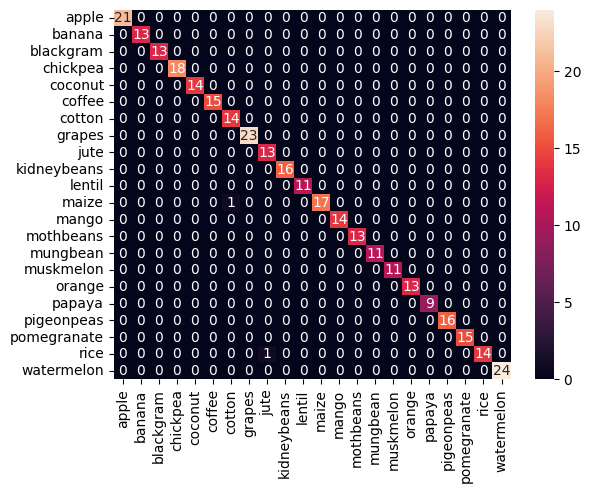

In [ ]:
# Con el objetivo de ver con mayor profundidad el desempeño del modelo utilizaremos
# una matrix de consufion, los que nos permitira ver de que manera se han clasificado
# las clases.

cm = confusion_matrix(y_test,predicted_values, labels=grid.classes_)
g = sns.heatmap(cm, annot=True)

g.set_xticklabels(grid.classes_, rotation=90)
g.set_yticklabels(grid.classes_, rotation=0)

plt.show()

### 5. Clusterizacion

In [ ]:
# A continuación, nos proponemos realizar la clusterización de nuestros datos
# en base a las variables de temperatura, humedad y lluvia.
# El objetivo principal es identificar grupos homogéneos que reflejen patrones
# ambientales similares. Esta clusterización nos permitirá ofrecer sugerencias
# al agricultor sobre otras semillas que podrían ser plantadas,
# considerando las características específicas de su entorno climático,
# facilitando así decisiones informadas y adaptadas a las condiciones ambientales particulares.

In [ ]:
# Seleccionamos las variables a utilizar en la clusterizacion.

clima = df.loc[:,['Temperatura', 'Lluvia', 'Humedad']]
scaler3 = StandardScaler()
clima = scaler3.fit_transform(clima)

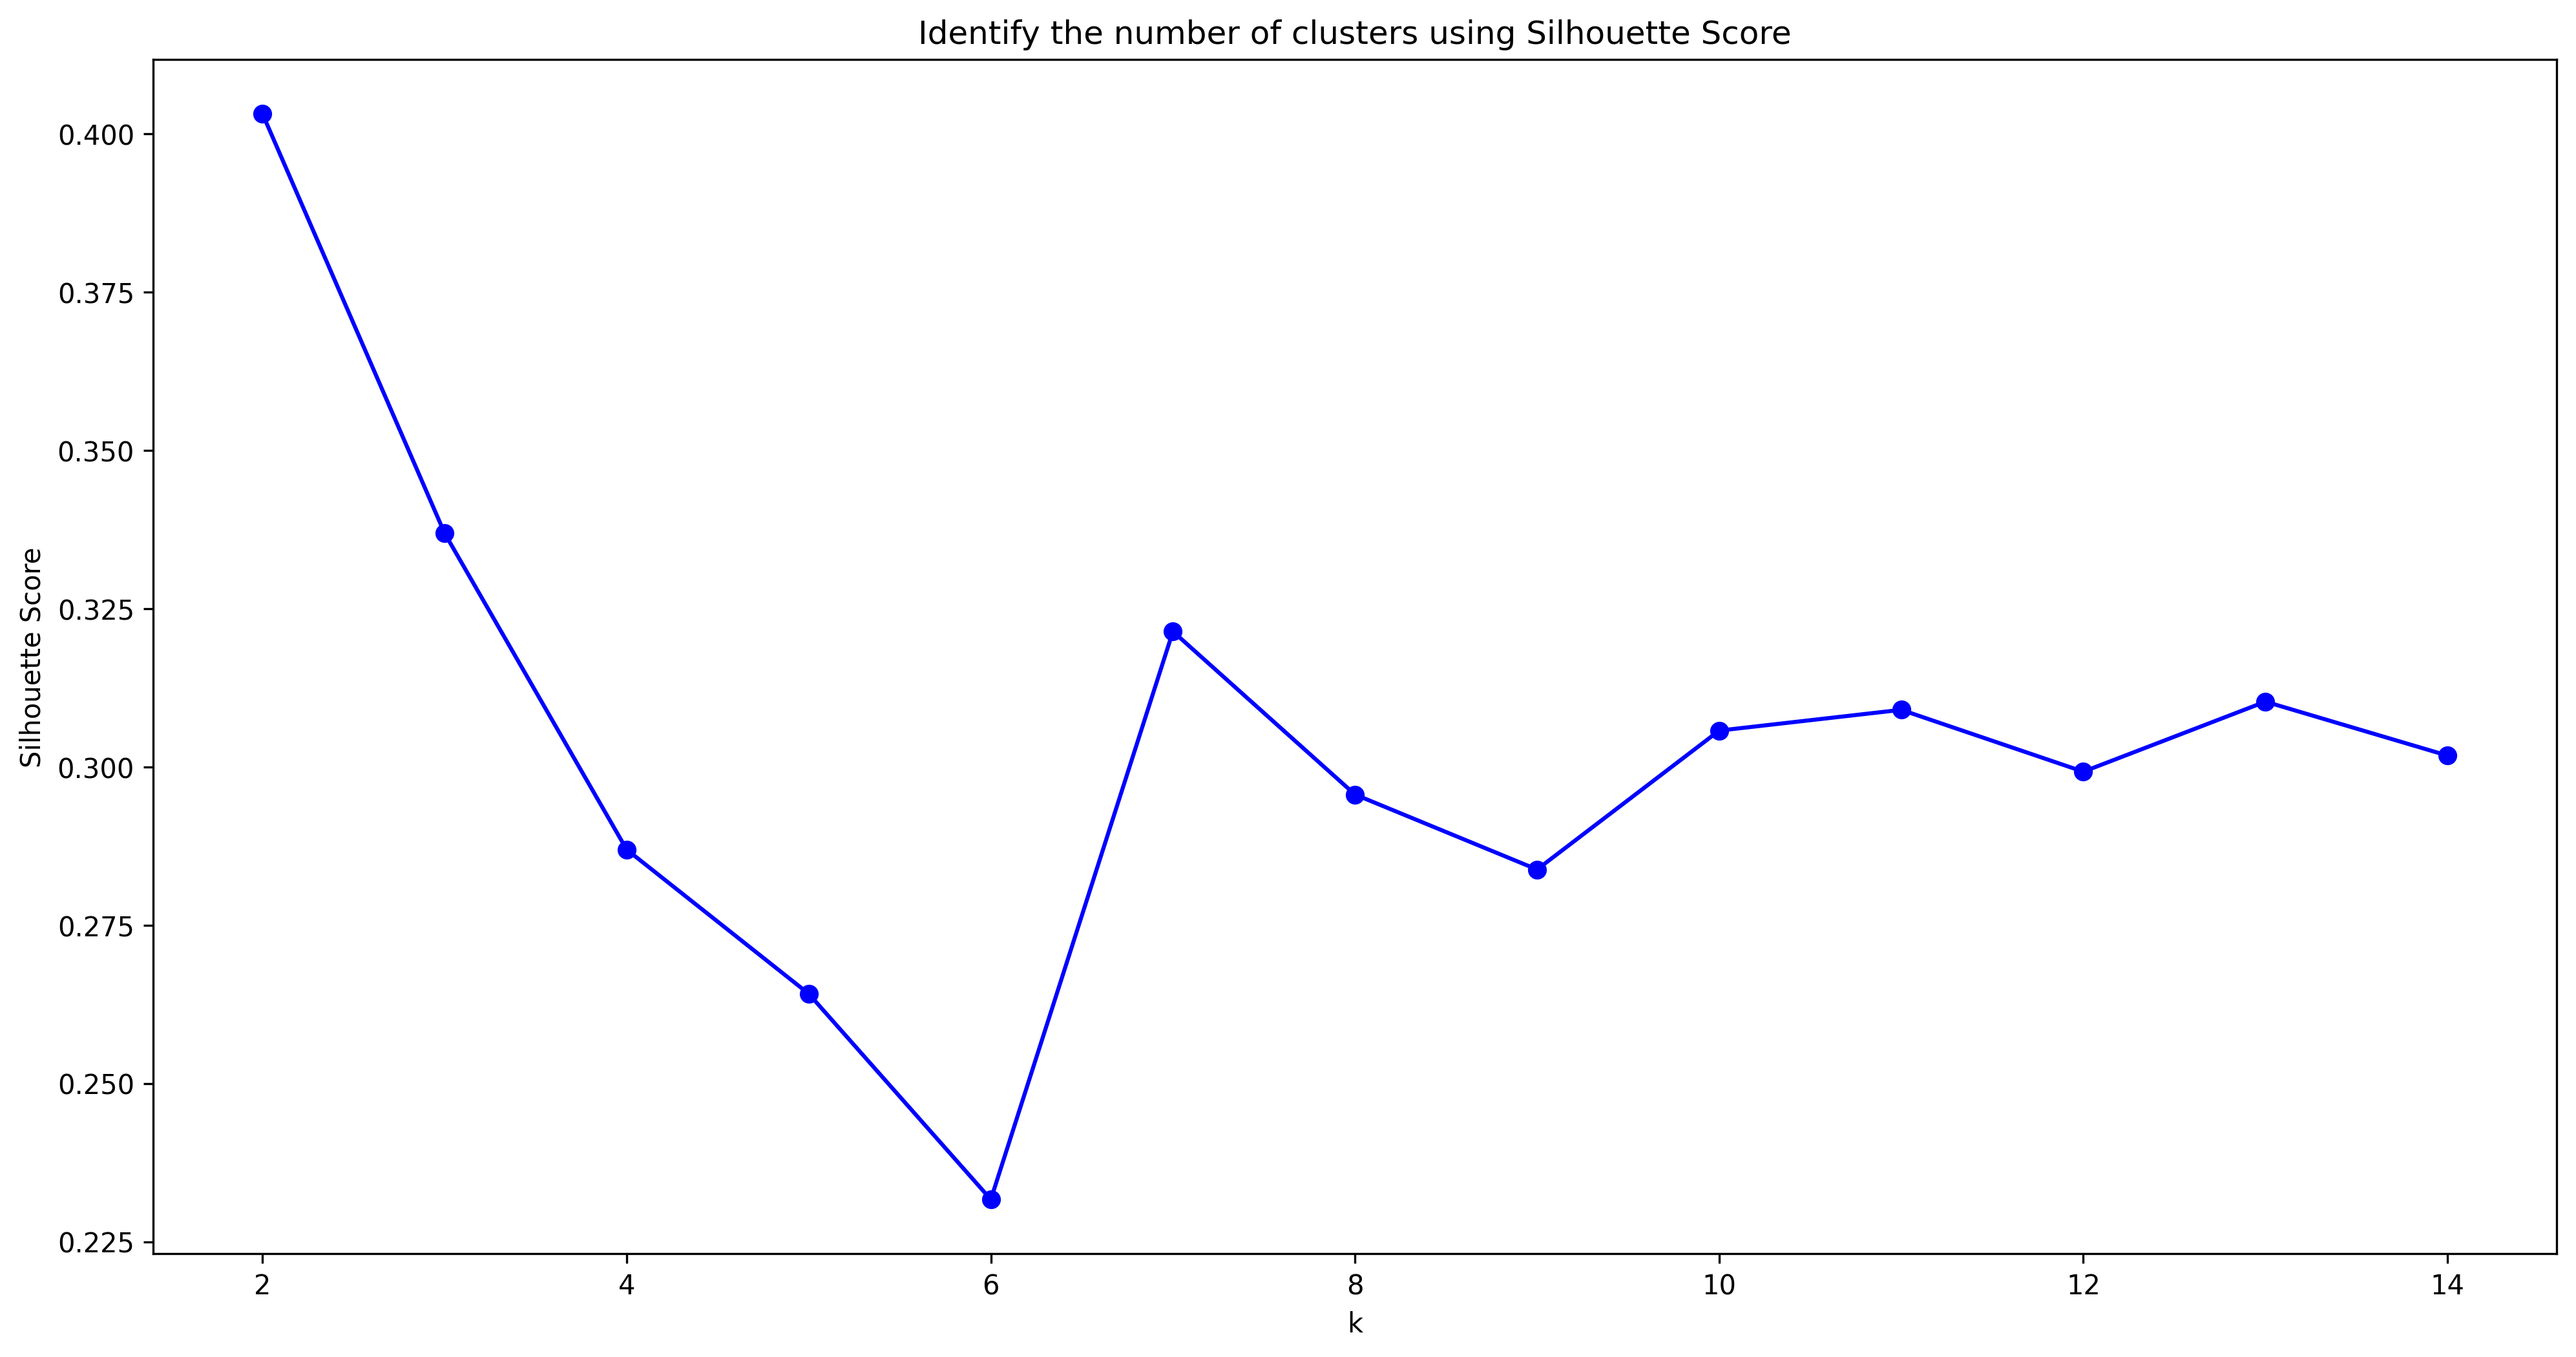

In [ ]:
# Primero tenemos que identificar el numero optimo de componentes. Para ello
# utilizaremos como guia el Silhoutte Score. En general, cuanto mayor
# sea la puntuación de Silhouette, mejor definidos estarán sus grupos.


# Codigo cortesia de https://towardsdatascience.com/gmm-gaussian-mixture-models-how-to-successfully-use-it-to-cluster-your-data-891dc8ac058f

# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,15)

# Select data for clustering model
X = clima

for k in K:
    # Set the model and its parameters
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=10, init_params='kmeans')
    # Fit the model
    labels = gmm.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [ ]:
# Entrenaremos el modelo con el numero de componentes elegido -> 7.

GMM = GaussianMixture(n_components=7, covariance_type='full', random_state=10, init_params='kmeans')
labels = GMM.fit_predict(clima)

In [ ]:
# Creamos una nueva columna en nuestro set de datos con los clusteres creados.

df['cluster'] = labels

In [ ]:
# Numero de observaciones por cluster

df['cluster'].value_counts()

2    468
0    465
1    407
4    329
6    224
3    200
5    107
Name: cluster, dtype: int64

In [ ]:
# representamos los clusters

labels = labels
trace = go.Scatter3d(x=clima[:, 0], y=clima[:, 1], z=clima[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
# Observamos que semillas se encuentran dentro de cada cluster.

for i in range(0, 7):
  print(f"Cluster {i}: \n {df[df['cluster'] == i]['Label'].value_counts()} \n")

Cluster 0: 
 pomegranate    100
apple          100
orange          83
banana          80
grapes          47
cotton          35
coconut         11
papaya           7
maize            2
Name: Label, dtype: int64 

Cluster 1: 
 mungbean      100
watermelon    100
muskmelon     100
cotton         65
grapes         29
papaya          8
maize           5
Name: Label, dtype: int64 

Cluster 2: 
 mothbeans     100
blackgram     100
lentil        100
mango         100
maize          48
pigeonpeas     20
Name: Label, dtype: int64 

Cluster 3: 
 chickpea       100
kidneybeans    100
Name: Label, dtype: int64 

Cluster 4: 
 rice          100
jute          100
coconut        89
banana         19
papaya         18
pigeonpeas      1
orange          1
coffee          1
Name: Label, dtype: int64 

Cluster 5: 
 papaya    67
grapes    24
orange    16
Name: Label, dtype: int64 

Cluster 6: 
 coffee        99
pigeonpeas    79
maize         45
banana         1
Name: Label, dtype: int64 



<Figure size 1000x1000 with 0 Axes>

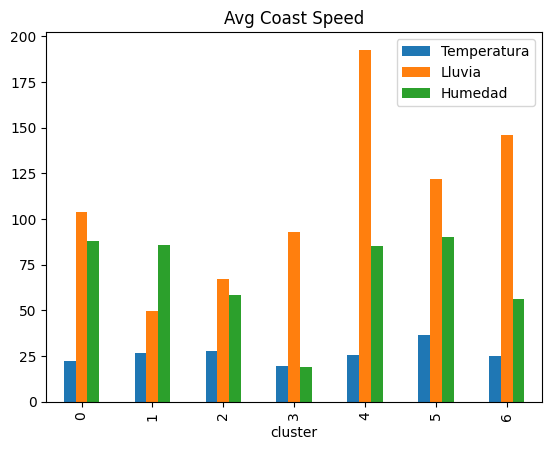

In [ ]:
# Caracteristicas medias de cada cluster.

plt.figure(figsize=(10,10))
df.groupby('cluster')[['Temperatura', 'Lluvia', 'Humedad']] \
  .agg(['mean']) \
  .plot(kind='bar', title= 'Avg Coast Speed')

plt.gca().legend(('Temperatura', 'Lluvia', 'Humedad'))

In [ ]:
# Creamos un diccionario con todos los clusteres

grupo = {}
for i in range(0,7):
  grupo[i] = df.loc[df['cluster'] == i]['Label'].value_counts().to_dict()

# Creamos una funcion que compruebe en cada cluster si existe esa semilla
# y tenga una presencia mayor del 65% de su
# totalidad, retornando todas las semillas en ese cluster que tienen una
# presencia mayor del 70%

def comprobacion(semilla, clusteres):
  resultado = dict()
  for i in range(0,7):
    if str(semilla) in clusteres[i] and clusteres[i][semilla] > 65:
      resultado = {k:v for (k,v) in clusteres[i].items() if v>70 and k is not x}
      if semilla in resultado.keys():
        del resultado[semilla]

      return list(resultado.keys())

# Creamos una funcion que emplee las variables estudiadas en el proyecto y
# nos diga la semilla adecuada a plantar y una sugerencia de otras semillas
# adecuadas segun unas mismas caracteristicas climaticas

def clasificacion(Nitrogeno, Fosforo, Potasio, Temperatura, Humedad, PH, Lluvia):
  standarize = scaler.transform(pd.DataFrame(np.array([[Nitrogeno,
                              Fosforo,
                              Potasio,
                              Temperatura,
                              Humedad,
                              PH,
                              Lluvia]]).reshape(1, -1), columns = ['Nitrogeno', 'Fosforo', 'Potasio', 'Temperatura', 'Humedad', 'PH', 'Lluvia']))

  semilla = model.predict(standarize)[0]
  output = comprobacion(semilla, grupo)
  print('La semilla sugerida adecuada es: ', semilla, '\n\n Otras semillas recomendads bajo las mismas condiciones climaticas: ',output)


In [ ]:
# Utilizamos la funcion

In [ ]:
clasificacion(39, 21, 9,13.208444,	94.027694,	6.354023,	106.269616)

La semilla sugerida adecuada es:  orange 

 Otras semillas recomendads bajo las mismas condiciones climaticas:  ['pomegranate', 'apple', 'banana']


In [ ]:
clasificacion(40, 40, 40, 40,	40,	40,	100)

La semilla sugerida adecuada es:  pigeonpeas 

 Otras semillas recomendads bajo las mismas condiciones climaticas:  ['coffee']
